In [1]:
import sys

import pprint

import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import random
import nltk

nltk.download('reuters')
nltk.download('pl196x')
import random

import numpy as np
import scipy as sp
from nltk.corpus import reuters
from nltk.corpus.reader import pl196x
from sklearn.decomposition import PCA, TruncatedSVD

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)

[nltk_data] Downloading package reuters to /home/jan/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package pl196x to /home/jan/nltk_data...
[nltk_data]   Package pl196x is already up-to-date!


In [2]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): list of distinct words across the 
            corpus, sorted (using python 'sorted' function)
            num_corpus_words (integer): number of distinct words across the 
            corpus
    """
    corpus_words = set()
    num_corpus_words = -1

    for document in corpus:
        for word in document:
            corpus_words.add(word)

    
    corpus_words = sorted(list(corpus_words))
    num_corpus_words = len(corpus_words)

    return corpus_words, num_corpus_words

In [3]:
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]     
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted(list(set([
    'Ala', 'END', 'START', 'i', 'kot', 'lubic', 'miec', 'pies'])))
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [4]:
test_corpus = [[],
               []]     
test_corpus_words, num_corpus_words = distinct_words(test_corpus)
test_corpus_words, num_corpus_words

([], 0)

In [5]:
import numpy as np

M = np.zeros((5, 5))
M

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
#################################
# TODO: b)
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
    
        Note: Each word in a document should be at the center of a window.
            Words near edges will have a smaller number of co-occurring words.
              
              For example, if we take the document "START All that glitters is not gold END" with window size of 4,
              "All" will co-occur with "START", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (numpy matrix of shape (number of corpus words, number of corpus words)): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the 
                same as the ordering of the words given by the distinct_words 
                function.
            word2Ind (dict): dictionary that maps word to index 
                (i.e. row/column number) for matrix M.
    """
    words, num_words = distinct_words(corpus)

    word2Ind = dict(zip(words, range(num_words)))

    M = np.zeros((num_words, num_words))

    for document in corpus:
        for word_index in range(len(document)):

            window_indices = list(range(max(0, word_index-window_size), 
                                        min(len(document), word_index+window_size+1)))
            window_indices.remove(word_index)
            for window_index in window_indices:
                M[word2Ind[document[word_index]]][word2Ind[document[window_index]]] += 1

    return M, word2Ind

# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# ---------------------

# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]     
M_test, word2Ind_test = compute_co_occurrence_matrix(
    test_corpus, window_size=1)

# Correct M and word2Ind
M_test_ans = np.array([
    [0., 0., 2., 0., 0., 1., 1., 0.],
    [0., 0., 0., 0., 1., 0., 0., 1.],
    [2., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 0., 0., 1.],
    [0., 1., 0., 1., 0., 1., 1., 0.],
    [1., 0., 0., 0., 1., 0., 0., 0.],
    [1., 0., 0., 0., 1., 0., 0., 0.],
    [0., 1., 0., 1., 0., 0., 0., 0.]
])

word2Ind_ans = {
    'Ala': 0, 'END': 1, 'START': 2, 'i': 3, 'kot': 4, 'lubic': 5, 'miec': 6,
    'pies': 7}

# Test correct word2Ind
assert (word2Ind_ans == word2Ind_test), "Your word2Ind is incorrect:\nCorrect: {}\nYours: {}".format(word2Ind_ans, word2Ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2Ind_ans.keys():
    idx1 = word2Ind_ans[w1]
    for w2 in word2Ind_ans.keys():
        idx2 = word2Ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)


--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [7]:
from sklearn.decomposition import TruncatedSVD


def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality
        (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following
         SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

        Params:
            M (numpy matrix of shape (number of corpus words, number 
                of corpus words)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)):
            matrix of k-dimensioal word embeddings.
            In terms of the SVD from math class, this actually returns U * S
    """
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))

    svd = TruncatedSVD(n_components=k, n_iter=n_iters, random_state=42)
    M_reduced = svd.fit_transform(M)

    print("Done.")
    return M_reduced

# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness 
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

# Define toy corpus and run student code
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]  
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 8), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 8)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 8 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Outputted Plot:


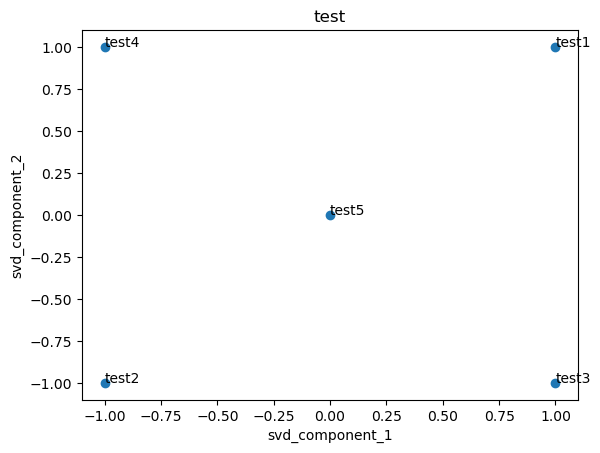

--------------------------------------------------------------------------------


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def plot_embeddings(M_reduced, word2Ind, words, path=None, title=None):
    """ Plot in a scatterplot the embeddings of the words specified 
        in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the
            corpus , k)): matrix of k-dimensioal word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to
            visualize
    """

    x = [M_reduced[word2Ind[word], 0] for word in words]
    y = [M_reduced[word2Ind[word], 1] for word in words]

    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel("svd_component_1")
    plt.ylabel("svd_component_2")

    for i, word in enumerate(words):
        plt.annotate(word, (x[i], y[i]))

    if path != None:
        plt.savefig(path)

    plt.show()



# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below. 
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {
    'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words, 'test.png', 'test')

print ("-" * 80)

Running Truncated SVD over 22957 words...
Done.


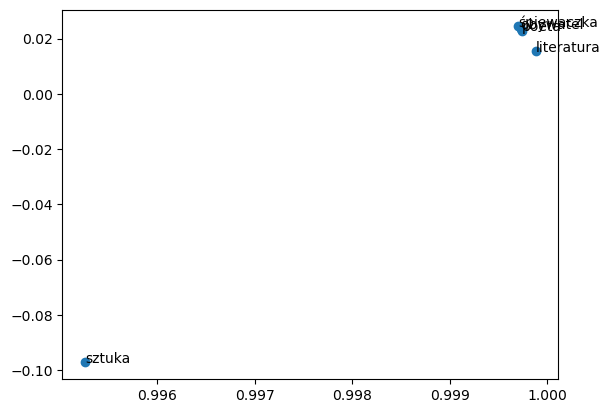

Running Truncated SVD over 22957 words...
Done.


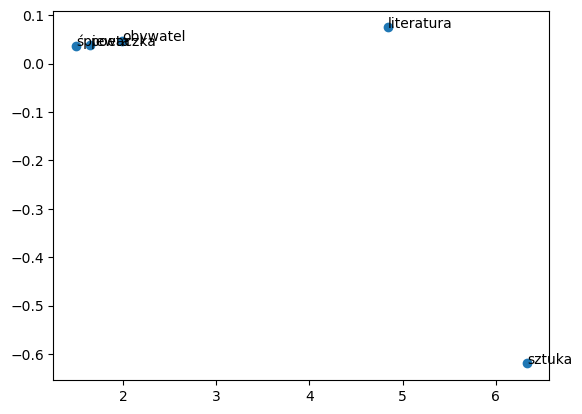

In [9]:
def read_corpus_pl():
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    pl196x_dir = nltk.data.find('corpora/pl196x')
    pl = pl196x.Pl196xCorpusReader(
        pl196x_dir, r'.*\.xml', textids='textids.txt',cat_file="cats.txt")
    tsents = pl.tagged_sents(fileids=pl.fileids(),categories='cats.txt')[:5000]

    return [[START_TOKEN] + [
        w[0].lower() for w in list(sent)] + [END_TOKEN] for sent in tsents]


def plot_unnormalized(corpus, words):
    M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(
        corpus)
    M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)
    plot_embeddings(M_reduced_co_occurrence, word2Ind_co_occurrence, words)


def plot_normalized(corpus, words):
    M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(
        corpus)
    M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)
    # Rescale (normalize) the rows to make them each of unit-length
    M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
    M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting
    plot_embeddings(M_normalized, word2Ind_co_occurrence, words)

pl_corpus = read_corpus_pl()
words = [
    "sztuka", "śpiewaczka", "literatura", "poeta", "obywatel"]

plot_normalized(pl_corpus, words)
plot_unnormalized(pl_corpus, words)

In [10]:
#################################
# Section 2:
#################################
# Then run the following to load the word2vec vectors into memory. 
# Note: This might take several minutes.
wv_from_bin_pl = KeyedVectors.load("word2vec_100_3_polish.bin")

# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This may take several minutes
# -----------------------------------

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 10006 words...
Done.


/tmp/ipykernel_26640/3021300119.py:22: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  M.append(wv_from_bin.word_vec(w))
/tmp/ipykernel_26640/3021300119.py:29: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  M.append(wv_from_bin.word_vec(w))


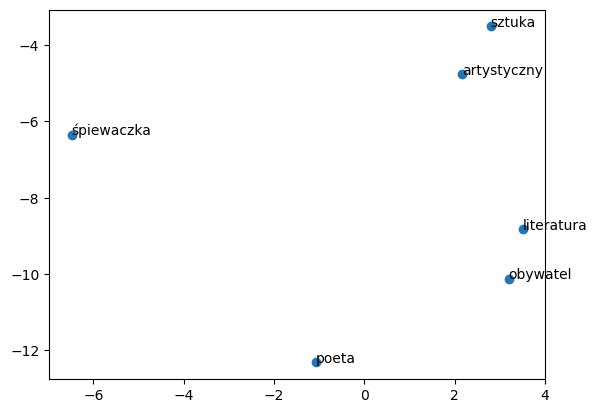

In [11]:
#################################
# TODO: a)
def get_matrix_of_vectors(wv_from_bin, required_words):
    """ Put the word2vec vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 3 million word2vec vectors
                         loaded from file
        Return:
            M: numpy matrix shape (num words, 300) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
    """
    words = list(wv_from_bin.key_to_index.keys())
    print("Shuffling words ...")
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind

# -----------------------------------------------------------------
# Run Cell to Reduce 300-Dimensinal Word Embeddings to k Dimensions
# Note: This may take several minutes
# -----------------------------------------------------------------

#################################
# TODO: a)
words = [
    "sztuka", "śpiewaczka", "literatura", "poeta", "artystyczny", "obywatel"]
M, word2Ind = get_matrix_of_vectors(wv_from_bin_pl, words)
M_reduced = reduce_to_k_dim(M, k=2)

plot_embeddings(M_reduced, word2Ind, words)

In [12]:
wv_from_bin_pl.most_similar("stówa")

/home/jan/.local/lib/python3.10/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('słowa', 0.6893048286437988),
 ('cent', 0.6367954015731812),
 ('słowo', 0.6246823072433472),
 ('stówka', 0.6103435158729553),
 ('słówko', 0.608944833278656),
 ('pens', 0.5825462937355042),
 ('tów', 0.5744858980178833),
 ('wers', 0.573552668094635),
 ('centym', 0.5726915597915649),
 ('komunał', 0.5709105730056763)]

In [13]:
display(wv_from_bin_pl.most_similar("pióro"))

[('ołówek', 0.7772570848464966),
 ('kałamarz', 0.7675008177757263),
 ('długopis', 0.749649167060852),
 ('stalówka', 0.7384116649627686),
 ('pióra', 0.7325249910354614),
 ('pędzelek', 0.7157161235809326),
 ('obsadka', 0.7098774909973145),
 ('pergamin', 0.6852117776870728),
 ('inkaust', 0.675581157207489),
 ('piórko', 0.653999924659729)]

In [14]:
w1 = "radosny"
w2 = "pogodny"
w3 = "smutny"
w1_w2_dist = wv_from_bin_pl.distance(w1, w2)
w1_w3_dist = wv_from_bin_pl.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms radosny, pogodny have cosine distance: 0.3306429386138916
Antonyms radosny, smutny have cosine distance: 0.347899854183197


In [15]:
w1 = "duży"
w2 = "tęgi"
w3 = "mały"
w1_w2_dist = wv_from_bin_pl.distance(w1, w2)
w1_w3_dist = wv_from_bin_pl.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms duży, tęgi have cosine distance: 0.6592637896537781
Antonyms duży, mały have cosine distance: 0.25460952520370483


In [16]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=["tata"], negative=[]))

[('tatuś', 0.9026258587837219),
 ('tato', 0.7971670031547546),
 ('dziadek', 0.780889093875885),
 ('mamusia', 0.7725973129272461),
 ('babcia', 0.7666307091712952),
 ('wujek', 0.7497749924659729),
 ('tatko', 0.7422767877578735),
 ('wujko', 0.7392509579658508),
 ('synek', 0.7334052920341492),
 ('ciocia', 0.7061461806297302)]


In [17]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=["kobieta", "władca"], negative=["mężczyzna"]))

[('władczyni', 0.7830896973609924),
 ('monarcha', 0.7474720478057861),
 ('król', 0.7462131977081299),
 ('monarchini', 0.7273676991462708),
 ('królowa', 0.6773377656936646),
 ('cesarz', 0.6653183698654175),
 ('hołdownik', 0.6651275157928467),
 ('padyszach', 0.6644163131713867),
 ('satrapa', 0.6641505360603333),
 ('możnowładca', 0.6494696736335754)]


In [18]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=["ryba", "latać"], negative=["ptak"]))

[('miesiąc', 0.7154368162155151),
 ('lato', 0.6962296366691589),
 ('tydzień', 0.6849808096885681),
 ('doba', 0.5967993140220642),
 ('dekada', 0.5900819897651672),
 ('dzień', 0.584226667881012),
 ('godzina', 0.5746790766716003),
 ('dziesięciolecie', 0.572984516620636),
 ('stulecie', 0.559540867805481),
 ('rok', 0.5404884219169617)]


In [19]:

print()
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['mezczyzna'], negative=[]))




[('chlopiec', 0.8143627047538757),
 ('mezczyzne', 0.8100571632385254),
 ('mezczyzny', 0.7829848527908325),
 ('mezczyzni', 0.7822571396827698),
 ('kobiete', 0.7667574882507324),
 ('kiedys', 0.7440332770347595),
 ('mlody', 0.7302094101905823),
 ('czlowiekiem', 0.730177104473114),
 ('dziewczeta', 0.7239168286323547),
 ('czlowiek', 0.7219058871269226)]


In [20]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['mezczyzna', 'prezes'], negative=['kobieta']))


[('wiceprezes', 0.6396454572677612),
 ('czlonkiem', 0.5929950475692749),
 ('przewodniczący', 0.5746127963066101),
 ('czlonek', 0.5648552179336548),
 ('przewodniczacym', 0.5586849451065063),
 ('wiceprzewodniczący', 0.5560489892959595),
 ('obowiazków', 0.5549101233482361),
 ('obowiazani', 0.5544129610061646),
 ('dyrektor', 0.5513691306114197),
 ('obowiazany', 0.5471130609512329)]


In [21]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['biały'], negative=['czarny']))

[('dohnalów', 0.43835189938545227),
 ('bezpłatnie', 0.43815746903419495),
 ('parkerowie', 0.43060770630836487),
 ('głodować', 0.42783328890800476),
 ('wilsonowie', 0.4206942021846771),
 ('nowożeńcy', 0.4188128113746643),
 ('unicef', 0.4124410152435303),
 ('barack', 0.40384429693222046),
 ('dasowie', 0.40381231904029846),
 ('mavrakis', 0.40115079283714294)]


In [22]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['czarny'], negative=['biały']))

[('żelazy', 0.4573116898536682),
 ('wingiem', 0.4213998317718506),
 ('zawęźlenie', 0.42025598883628845),
 ('drillometer', 0.41730526089668274),
 ('biteń', 0.4157370626926422),
 ('sieżant', 0.4139999449253082),
 ('cymmeryjczyka', 0.41200801730155945),
 ('gorylowatej', 0.4082494378089905),
 ('ciometrowych', 0.40283823013305664),
 ('bełt', 0.402444064617157)]


In [23]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['meżczyzna'], negative=['kobieta']))

[('zaatakowac', 0.5070675611495972),
 ('dokonczyl', 0.5051069259643555),
 ('bagaz', 0.49883756041526794),
 ('niebezpieczenstwa', 0.49833419919013977),
 ('zmierzyc', 0.497328519821167),
 ('niedermayr', 0.4963065981864929),
 ('oszolomiony', 0.4955935776233673),
 ('wrzeszczec', 0.4900546371936798),
 ('przestancie', 0.4895210862159729),
 ('odwazny', 0.4894097149372101)]


In [24]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['kobieta'], negative=['mężczyzna']))

[('jemnicę', 0.5955303311347961),
 ('francuzica', 0.5922670960426331),
 ('heloizą', 0.5670387148857117),
 ('laotong', 0.5662394762039185),
 ('bułczarka', 0.5638110041618347),
 ('heloizie', 0.5594379901885986),
 ('ekskuza', 0.559043288230896),
 ('mlodości', 0.556476891040802),
 ('rujhollę', 0.5524717569351196),
 ('francuzeczka', 0.5478253960609436)]


In [25]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['mężczyzna'], negative=['kobieta']))

[('sauradyjskiego', 0.543503999710083),
 ('noway', 0.5132113695144653),
 ('gueyama', 0.49078604578971863),
 ('lewtanim', 0.4851609766483307),
 ('morelaka', 0.47792068123817444),
 ('jeľdziec', 0.4721604883670807),
 ('forcik', 0.46399614214897156),
 ('trzyrundowe', 0.4639435112476349),
 ('simb', 0.4617699682712555),
 ('zingarska', 0.4617287516593933)]


In [26]:
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec

# model = Word2Vec(sentences=, vector_size=300, window=5, min_count=1, workers=4)
# model.wv['computer']

In [27]:
wv_from_bin = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

In [28]:
wv_from_bin['car']

array([ 0.13085938,  0.00842285,  0.03344727, -0.05883789,  0.04003906,
       -0.14257812,  0.04931641, -0.16894531,  0.20898438,  0.11962891,
        0.18066406, -0.25      , -0.10400391, -0.10742188, -0.01879883,
        0.05200195, -0.00216675,  0.06445312,  0.14453125, -0.04541016,
        0.16113281, -0.01611328, -0.03088379,  0.08447266,  0.16210938,
        0.04467773, -0.15527344,  0.25390625,  0.33984375,  0.00756836,
       -0.25585938, -0.01733398, -0.03295898,  0.16308594, -0.12597656,
       -0.09912109,  0.16503906,  0.06884766, -0.18945312,  0.02832031,
       -0.0534668 , -0.03063965,  0.11083984,  0.24121094, -0.234375  ,
        0.12353516, -0.00294495,  0.1484375 ,  0.33203125,  0.05249023,
       -0.20019531,  0.37695312,  0.12255859,  0.11425781, -0.17675781,
        0.10009766,  0.0030365 ,  0.26757812,  0.20117188,  0.03710938,
        0.11083984, -0.09814453, -0.3125    ,  0.03515625,  0.02832031,
        0.26171875, -0.08642578, -0.02258301, -0.05834961, -0.00

In [29]:
wv_from_bin_pl.most_similar("blok")

[('barak', 0.6527604460716248),
 ('budynek', 0.6320288181304932),
 ('kolumna', 0.6194155216217041),
 ('sześcian', 0.6162456274032593),
 ('bunkier', 0.6111130118370056),
 ('sektor', 0.6096233129501343),
 ('platforma', 0.6064298748970032),
 ('prostopadłościan', 0.6036525964736938),
 ('segment', 0.5993013381958008),
 ('panel', 0.5989246964454651)]

In [30]:
wv_from_bin.most_similar("block")

[('blocks', 0.542980968952179),
 ('Exume_tried', 0.5398644208908081),
 ('Kedvale_Avenue', 0.5273462533950806),
 ('Terroristic_threat', 0.5273101925849915),
 ('Hoyne_Avenue', 0.5253447890281677),
 ('Goguac_Street', 0.5237467288970947),
 ('Briarwood_Drive', 0.5208165049552917),
 ('Boxwood_Drive', 0.5202006101608276),
 ('Avers_Avenue', 0.5156642198562622),
 ('Woodale_Avenue', 0.5076020956039429)]

In [31]:
wv_from_bin.most_similar("car")

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423831224441528),
 ('SUV', 0.7160962224006653),
 ('minivan', 0.6907036900520325),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.667320191860199),
 ('Honda_Civic', 0.6626849174499512),
 ('Jeep', 0.651133120059967),
 ('pickup_truck', 0.6441438794136047)]

In [32]:
w1 = "big"
w2 = "colossal"
w3 = "small"
w1_w2_dist = wv_from_bin.distance(w1, w2)
w1_w3_dist = wv_from_bin.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms big, colossal have cosine distance: 0.49641215801239014
Antonyms big, small have cosine distance: 0.5041321516036987


In [33]:
pprint.pprint(wv_from_bin.most_similar(
    positive=["little", "higher"], negative=["lower"]))

[('bit', 0.7062703967094421),
 ('much', 0.5927826166152954),
 ('wee_bit', 0.5753095149993896),
 ('lot', 0.5397298336029053),
 ("everything'sa", 0.5307227373123169),
 ('teeny_bit', 0.5167810320854187),
 ('maybe', 0.5110480785369873),
 ('smidgen', 0.49733006954193115),
 ('litte', 0.49377959966659546),
 ('scant', 0.49189597368240356)]


In [34]:
pprint.pprint(wv_from_bin.most_similar(
    positive=["fish", "fly"], negative=["bird"]))

[('longline_vessels', 0.48074957728385925),
 ('fishing', 0.4567126929759979),
 ('fished', 0.44685736298561096),
 ('fishes', 0.43080002069473267),
 ('tuna', 0.4262666702270508),
 ('shad_darts', 0.4228907823562622),
 ('overfish', 0.4222323000431061),
 ('mackerel', 0.41814762353897095),
 ('saithe', 0.4176707863807678),
 ('mangrove_snappers', 0.41631370782852173)]


In [35]:
pprint.pprint(wv_from_bin.most_similar(
    positive=['woman', 'boss'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(
    positive=['man', 'president'], negative=['woman']))

[('bosses', 0.5522644519805908),
 ('manageress', 0.49151360988616943),
 ('exec', 0.45940810441970825),
 ('Manageress', 0.4559843838214874),
 ('receptionist', 0.4474116563796997),
 ('Jane_Danson', 0.44480547308921814),
 ('Fiz_Jennie_McAlpine', 0.4427576959133148),
 ('Coronation_Street_actress', 0.44275563955307007),
 ('supremo', 0.4409853219985962),
 ('coworker', 0.43986251950263977)]

[('President', 0.6693714261054993),
 ('chairman', 0.6291338801383972),
 ('chief_executive', 0.5799599885940552),
 ('CEO', 0.5605502128601074),
 ('pesident', 0.5466867089271545),
 ('Chairman', 0.5464242696762085),
 ('vice_president', 0.5376487374305725),
 ('prez', 0.5215684175491333),
 ('Presdient', 0.5107682347297668),
 ('presient', 0.498538076877594)]


In [36]:
pprint.pprint(wv_from_bin.most_similar(
    positive=['man'], negative=['woman']))

[('Shaun_Maloney_Aiden_McGeady', 0.35027220845222473),
 ('tactically_adept', 0.3487197160720825),
 ('Matt_Bramald', 0.3400961458683014),
 ('strongside_LB', 0.337636798620224),
 ('newboy', 0.33329278230667114),
 ('Philip_Boampong', 0.33152341842651367),
 ('joker', 0.3312978446483612),
 ('superpest', 0.3302587866783142),
 ('TRENDING_UP', 0.3300756514072418),
 ('Felipe_Claybrooks', 0.3289523720741272)]


In [37]:
pprint.pprint(wv_from_bin.most_similar(
    positive=['woman'], negative=['man']))

[('she', 0.45412716269493103),
 ('her', 0.39712801575660706),
 ('Certified_Nurse_Midwife', 0.3824717402458191),
 ('Ms.', 0.37514764070510864),
 ('silicone_gel_implant', 0.3704040050506592),
 ('girlhood', 0.37001779675483704),
 ('nurse_midwife', 0.369699090719223),
 ('undergo_hysterectomy', 0.36893028020858765),
 ('silicone_breast_implants', 0.3683786392211914),
 ('breastfeeds', 0.36699435114860535)]
